In [1]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import pickle
from sklearn.metrics import ConfusionMatrixDisplay
# import xgboost as xgb
from xgboost import XGBClassifier

In [30]:
MNIST = sio.loadmat('MNIST.mat')
MNIST.keys()

listofboosts = []

In [31]:
# load feature and class vectors from MNISTmini
trainFea = MNIST['train_fea']
trainClass = MNIST['train_gnd']
testFea = MNIST['test_fea']
testClass = MNIST['test_gnd']

trainClass -= 1
testClass -= 1

In [32]:
# shuffle and crop data to include random points
dataFea, dataClass = shuffle(trainFea, trainClass, random_state=0)
trainFea, trainClass = dataFea[30000:60000], dataClass[30000:60000]
valiFea, valiClass = dataFea[0:30000], dataClass[0:30000]
testFea, testClass = shuffle(testFea, testClass, random_state=0)
testFea, testClass = testFea[0:10000], testClass[0:10000]
print(trainClass)
print(trainFea)

[[6]
 [0]
 [5]
 ...
 [7]
 [7]
 [0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:

xgboost = XGBClassifier(max_leaves = 15)

#pickle.dump(xgboost, "xgboost_classifier.pkl", "wb")
#trn_model = pickle.load("xgboost_classifier.pkl", "rb")

In [33]:
xgboost.fit(trainFea, trainClass.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=15,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [9]:
# predict = xgboost.predict(testFea, testClass)



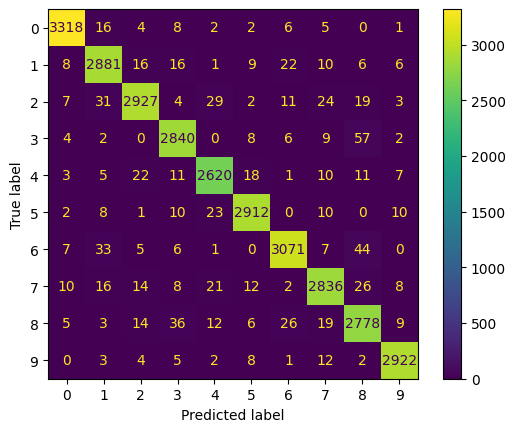

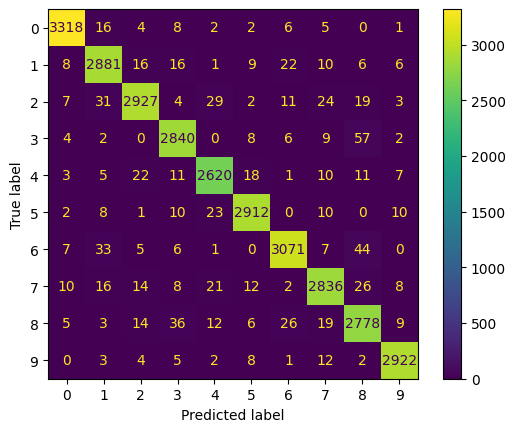

In [34]:

disp = ConfusionMatrixDisplay.from_estimator(xgboost, valiFea, valiClass)
disp.plot()

In [ ]:

disp = ConfusionMatrixDisplay.from_estimator(xgboost, testFea, testClass)
disp.plot()
disp.show()